In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,accuracy_score, classification_report ,precision_score , recall_score , f1_score , make_scorer , confusion_matrix
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('Customer Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [4]:
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


Text(0, 0.5, 'Frequency of use')

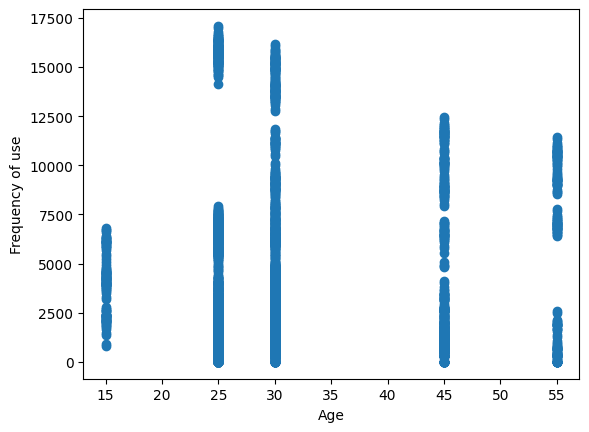

In [5]:


plt.scatter(data["Age"],data["Seconds of Use"])
plt.xlabel('Age')
plt.ylabel('Frequency of use')



In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[["Call  Failure","Complains", "Subscription  Length", "Charge  Amount", "Seconds of Use", "Frequency of use", "Frequency of SMS", "Distinct Called Numbers", "Age", "Customer Value"]])


# ...
data_scaled_df = pd.DataFrame(data_scaled)

# Combine features and encoded categorical data
data_processed = pd.concat([data_scaled_df, data[["Age Group", "Tariff Plan", "Status"]]], axis=1)
data_processed.columns = data_processed.columns.astype(str)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

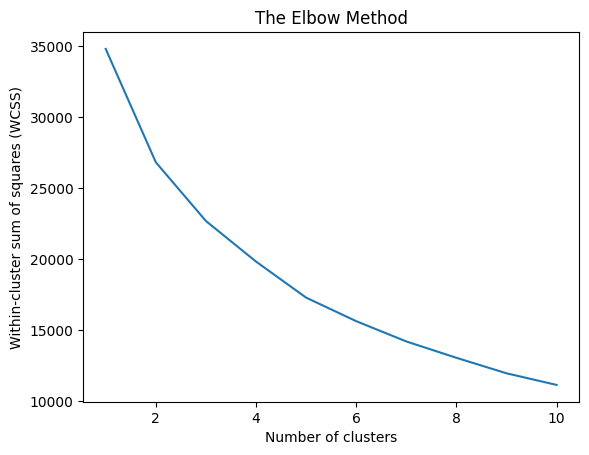

In [7]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_processed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.show()

In [8]:
x=data[["Call  Failure","Complains", "Subscription  Length", "Charge  Amount", "Seconds of Use", "Frequency of use", "Frequency of SMS", "Distinct Called Numbers", "Age", "Customer Value"]]
x_scaled = preprocessing.scale(x)

kmeans = KMeans(4)
kmeans.fit(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [9]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = kmeans.fit_predict(x_scaled)
data_with_clusters.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Clusters
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0,1
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,1
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0,3
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0,1
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,1


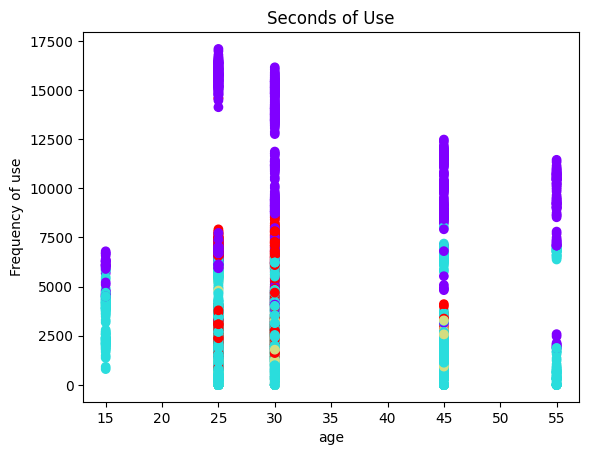

In [10]:
plt.scatter(data["Age"],data["Seconds of Use"], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.title('Seconds of Use')
plt.xlabel('age')
plt.ylabel('Frequency of use')
plt.show()

In [11]:
x2 = data[['Customer Value', 'Seconds of Use']]
x2_scaled = preprocessing.scale(x2)

kmeans2 = KMeans(3)
kmeans2.fit(x2_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

data_with_clusters2 = data.copy()
data_with_clusters2['Clusters'] = kmeans2.fit_predict(x2_scaled)
data_with_clusters2



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Clusters
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0,1
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0,1
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0,2
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0,1


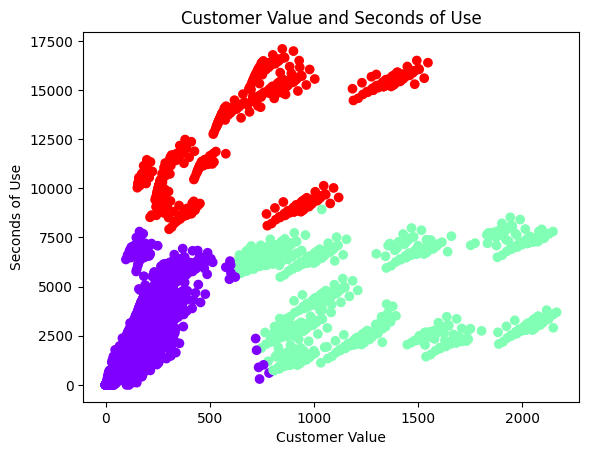

In [12]:
plt.scatter(data['Customer Value'],data['Seconds of Use'], c=data_with_clusters2['Clusters'], cmap='rainbow')
plt.title('Customer Value and Seconds of Use')
plt.xlabel('Customer Value')
plt.ylabel('Seconds of Use')
plt.show()

In [13]:
x2 = data[['Subscription  Length', 'Customer Value']]
x2_scaled = preprocessing.scale(x2)

kmeans2 = KMeans(3)
kmeans2.fit(x2_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

data_with_clusters2 = data.copy()
data_with_clusters2['Clusters'] = kmeans2.fit_predict(x2_scaled)
data_with_clusters2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Clusters
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0,1
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,1
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0,2
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0,1
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0,0


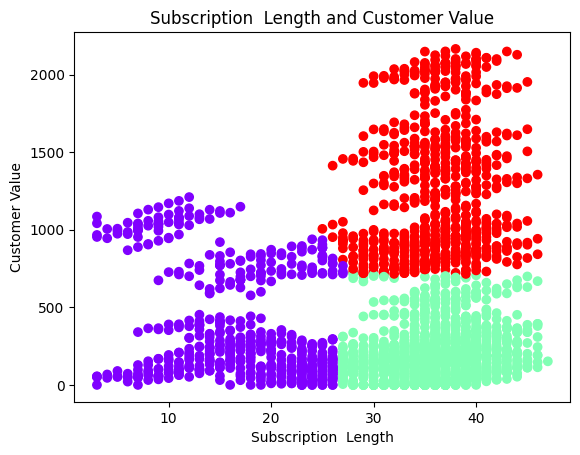

In [14]:
plt.scatter(data['Subscription  Length'],data['Customer Value'], c=data_with_clusters2['Clusters'], cmap='rainbow')
plt.title('Subscription  Length and Customer Value')
plt.xlabel('Subscription  Length')
plt.ylabel('Customer Value')
plt.show()